img shape:  (654, 492)


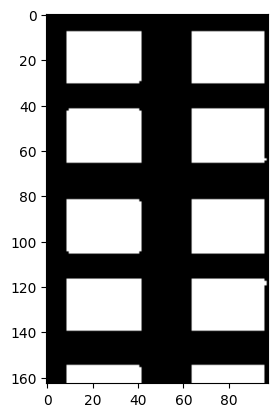

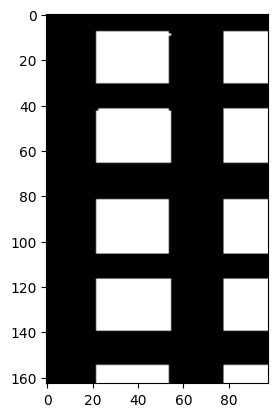

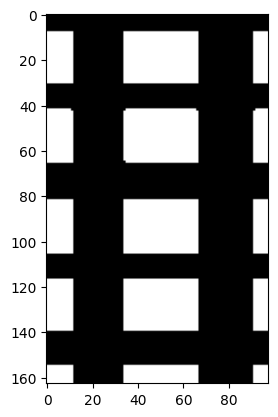

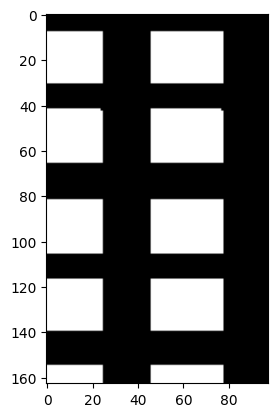

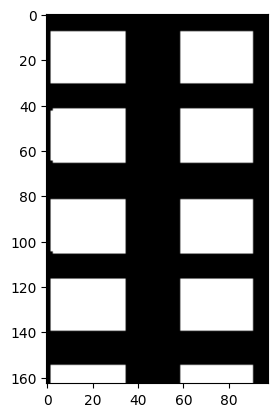

Cell_collector-2 Number of cells in current row = 45
Cell_validation-4: 61646 list received with length= 45


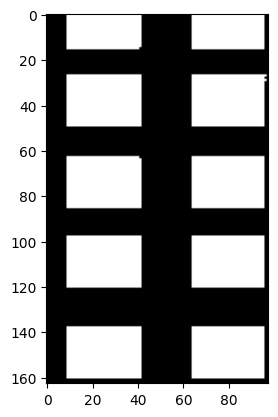

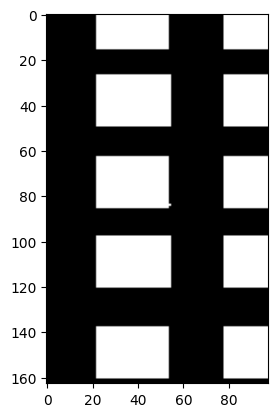

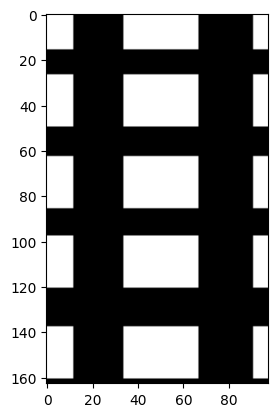

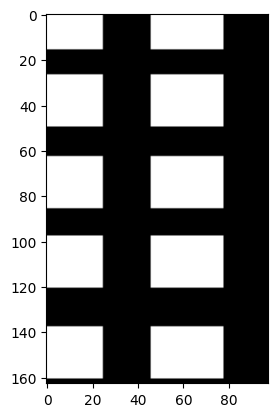

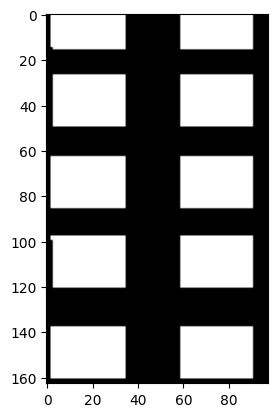

Cell_collector-2 Number of cells in current row = 45
Cell_validation-4: 61646 list received with length= 45


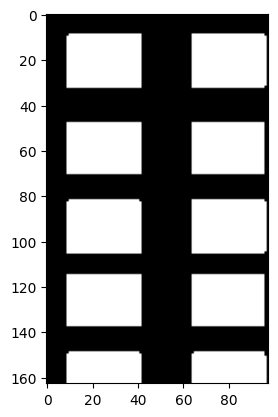

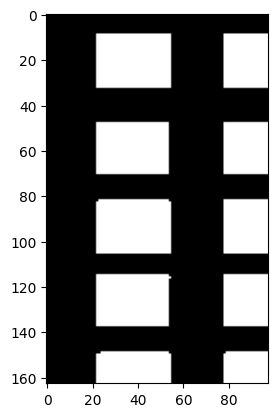

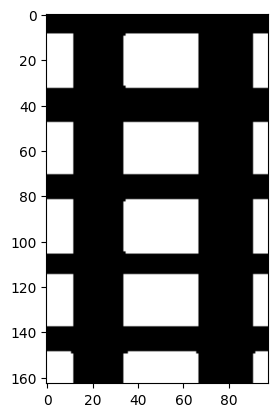

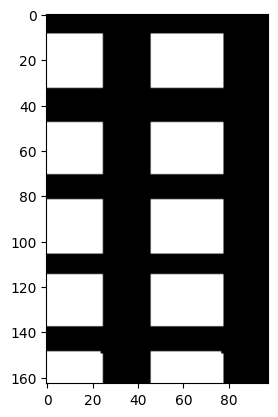

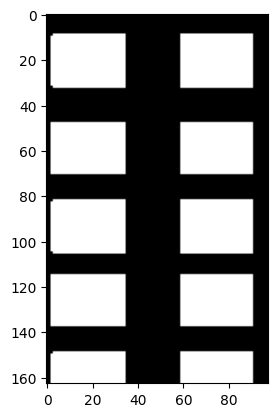

Cell_collector-2 Number of cells in current row = 45
Cell_validation-4: 61646 list received with length= 45


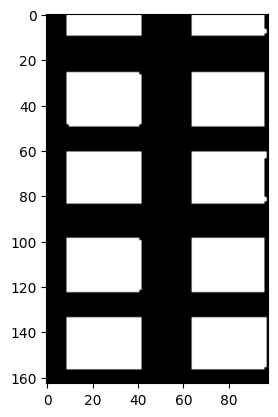

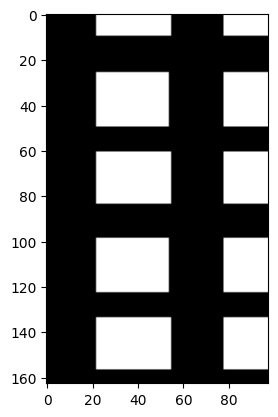

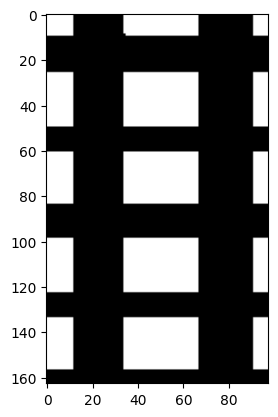

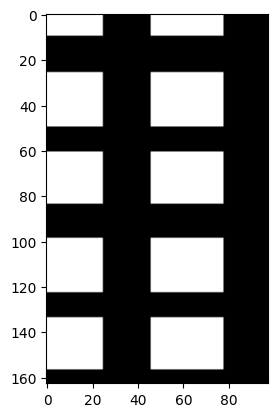

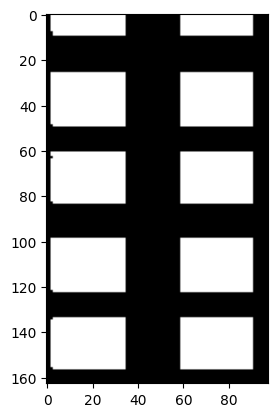

Cell_collector-2 Number of cells in current row = 45
 Cell_collector-2 Child thread exiting


 Cell_collector-2 Parent thread exitingCell_validation-4: 61646 list received with length= 45

Cell_validation-4: 61646 list received with length= 0


In [1]:
import os
import multiprocessing
import time
import random
from fourier import *
from parallel_task_classes import *

if __name__ == '__main__':

    # Define parameters
    layout_name = "36.png"  # Replace with your image path 
    layout_path = os.path.join( os.getcwd(), 'images', layout_name)
    
    # Establish communication queues.
    cell_queue = multiprocessing.Queue()
    partial_cell_queue = multiprocessing.Queue()
    sorted_cell_queue_layout = multiprocessing.Queue()
    sorted_cell_queue_SEM = multiprocessing.Queue()
    window_event = multiprocessing.Event()
    extractor_done_event = multiprocessing.Event()
    merger_done_event = multiprocessing.Event()
    row_done_event = multiprocessing.Event()
    extractor_conn, collector_conn = multiprocessing.Pipe()
    
    cell_extractor_layout = Cell_extractor(cell_queue, partial_cell_queue, layout_path, 
                                           extractor_done_event, row_done_event, extractor_conn)
    cell_collector_layout = Cell_collector(cell_queue, sorted_cell_queue_layout,
                                           extractor_done_event, merger_done_event, row_done_event, collector_conn)
    cell_merger_layout = Cell_merger(partial_cell_queue, cell_queue, 
                                     extractor_done_event, merger_done_event)

    cell_validation = Cell_validation(sorted_cell_queue_layout, sorted_cell_queue_SEM)
    
    cell_extractor_layout.start()
    cell_collector_layout.start()
    cell_merger_layout.start()
    
    cell_validation.start()
    
    cell_extractor_layout.join()
    cell_collector_layout.join()
    cell_merger_layout.join()